In [1]:
import pandas as pd
import numpy as np 
import os
import glob
from pprint import pprint
import string
from string import digits
import statistics
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

import tensorflow as tf
from sklearn import metrics

from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.neural_network import MLPClassifier

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Conv1D, MaxPooling1D, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D


from keras.layers.embeddings import Embedding

from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense


### Part 1B
(b) Data Exploration and Pre-processing
i. You can use binary encoding for the sentiments , i.e y = 1 for positive senti-
ments and y = -1 for negative sentiments.

ii. The data are pretty clean. Remove the punctuation and numbers from the
data.

iii. The name of each text file starts with cv number. Use text files 0-699 in each
class for training and 700-999 for testing.

iv. Count the number of unique words in the whole dataset (train + test) and
print it out.

v. Calculate the average review length and the standard deviation of review
lengths. Report the results.

vi. Plot the histogram of review lengths.

vii. To represent each text (= data point), there are many ways. In NLP/Deep
Learning terminology, this task is called tokenization. It is common to rep-
resent text using popularity/ rank of words in text. The most common word
in the text will be represented as 1, the second most common word will be
represented as 2, etc. Tokenize each text document using this method.2

viii. Select a review length L that 70% of the reviews have a length below it. If
you feel more adventurous, set the threshold to 90%.

ix. Truncate reviews longer than L words and zero-pad

In [2]:

# for i in positive: 
#     counter = 0 
#     files = glob.glob(os.path.join('../data/' + i))
#     files = ' '.join(map(str, files))
#     csv_files = glob.glob(os.path.join(files + "/*.csv"))
#     csv_files = sorted(csv_files, key=lambda x: int(re.match('\D*(\d+)', x).group(1)))

In [3]:
# os.chdir("../Data/pos/")
# for file in glob.glob("*.txt"):
#     print(file)
    
# os.chdir("../Data/neg/")
# for file in glob.glob("*.txt"):
#     print(file)

In [4]:
pos_files_path = glob.glob('../Data/pos/*.txt')
neg_files_path = glob.glob('../Data/neg/*.txt')
# print(pos_neg_test)


In [5]:
#Biii split train and test data 
pos_files_path_train = pos_files_path[:700]
pos_files_path_test = pos_files_path[700:]
neg_files_path_train = neg_files_path[:700]
neg_files_path_test = neg_files_path[700:]

pos_neg_train = pos_files_path_train + neg_files_path_train
pos_neg_test = pos_files_path_test + neg_files_path_test
print(len(pos_neg_train))
print(len(pos_neg_test))

1400
600


In [6]:
#Bii remove punctuation and digits 
#Biv count the total unique words in test + train 

pos_neg_train_test = pos_neg_train + pos_neg_test
length_text_train_test = []
unique_words_train_test = [] 

for i in pos_neg_train_test: 
    text = open(i, "r").read()
    text = text.translate(str.maketrans('', '', string.punctuation)) # this removes punctuation 
    text = text.translate(str.maketrans('', '', string.digits)) # this removs number 
    text = text.strip()
    text = " ".join(text.split())
    text_length = text.split(' ') ### this splits to calculate the number of words 
#     text_length = (len(text_length)) ### this finds number of words 
    length_text_train_test.append(len(text_length))
#     pprint(text)

##### this is to find the number of unique words
    for word in text.split(' '):
        word = word.strip()
        if word not in unique_words_train_test: 
            unique_words_train_test.append(word)
        else:
            continue

#     break
print('Total Data Unique Words')
print(len(unique_words_train_test))
# print(length_text_train_test)
#####-----------------------------------TEST DATA--------------------------------------------------------
# length_text_test = []
# unique_words_test = [] 

# for i in pos_neg_test: 
#     text = open(i, "r").read()
#     text = text.translate(str.maketrans('', '', string.punctuation))
#     text = text.translate(str.maketrans('', '', string.digits))
#     text = text.strip()
#     text = " ".join(text.split())
#     text_length = text.split(' ') ### this splits to calculate the number of words 
# #     text_length = (len(text_length)) ### this finds number of words 
#     length_text_test.append(len(text_length))
# #     pprint(text)
    
# #     text = list(text)
# #     print(len(text))

# ##### this is to find the number of unique words
#     for word in text.split(' '):
#         word = word.strip()
#         if word not in unique_words_test: 
#             unique_words_test.append(word)
#         else:
#             continue

# #     break
# print('Test Data Unique Words')
# print(len(unique_words_test))
# # print(length_text_test)
# print('Total Data - Unique Words')


Total Data Unique Words
46830


In [7]:
### B V. Calculate average review length and the standard adeviation of review lenghts 

standard_dev = statistics.stdev(length_text_train_test)
average_length = sum(length_text_train_test) / len(length_text_train_test)
print('All Data')
print("Average Length:", average_length)
print("Standard Deviation:",standard_dev)

# print('\n')
# standard_dev = statistics.stdev(length_text_test)
# average_length = sum(length_text_test) / len(length_text_test)
# print('Test Data')
# print("Average Length:", average_length)
# print("Standard Deviation:",standard_dev)

All Data
Average Length: 644.3555
Standard Deviation: 285.0511431249635


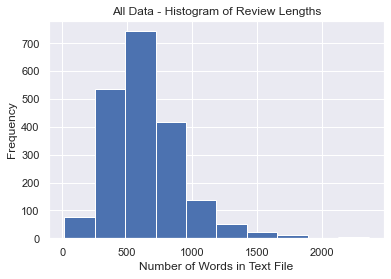

In [8]:
##### vi Plot the histogram of review lengths of all data(train+test).

# lenth_text_train_test = length_text_train + length_text_test #ploting length of all data 

plt.hist(length_text_train_test)
plt.title('All Data - Histogram of Review Lengths')
plt.xlabel("Number of Words in Text File")
plt.ylabel("Frequency")
plt.show()


In [9]:
#### incase we want to use stop words 

import nltk
from nltk.corpus import stopwords

# sentence = "Hi Test This is a sentence hello and we are"
def remove_stopwords(text): 
    text_tokens = word_tokenize(text)
    text_no_stopwords = [i for i in text_tokens if not i in stopwords.words("english")]
    no_stopwords_str = (" ").join(text_no_stopwords)

    return no_stopwords_str

# print(remove_stopwords(sentence))

In [10]:
### bi encode y=1 positive y =0 negative 
# B viii select review length at 70% 
# B Vii tokenize the train data and test data (see below for better tokenization (tokenize entire xtrain tog))  
# B ix truncate reviews and padding shorter than L 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
##### REMOVING STOP WORDS ATTEMPT 
text_length_70 = np.percentile(length_text_train_test, 70)  ### finding L 
print("70 Percentile Review Length:",text_length_70) # this is review length at 70 % for all dat 

x_train_70L_tokens = []
x_train_70L = []
y_train_70L = []
pos_neg_train_70L = [] # file paths for text that falls within the 70% percentile 
for i in pos_neg_train: 
    text = open(i, "r").read()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.strip()
    text = " ".join(text.split())
    text_length = str(text)
    text_length = text_length.split(' ') ### this splits to calculate the number of words 
    text_length = (len(text_length)) ### this finds number of words aka length
    
#     text = remove_stopwords(text) ##### this removes the stop words 
    text = [text]
#     print(text)
#     break
    if text_length <= text_length_70: 
        pos_neg_train_70L.append(i)
        x_train_70L.append(text)
        
        ### tokenize #### this was not used for the rest of the model
        t = Tokenizer() ### this tokenizes for each text, (was not used for this hw) # B Vii tokenize the train data and test data  
        t.fit_on_texts(text)
        token_text = t.texts_to_sequences(text)
        token_text = pad_sequences(token_text, maxlen=737,padding='post') # pads 0 to the right # B ix padding shorter than L 
        x_train_70L_tokens.append(token_text)
        
        if 'pos' in i:  # encoding 1 for pos 
            y_train_70L.append(1)
        elif 'neg' in i: # encoding 0 for neg
            y_train_70L.append(0)
            
# print(len(x_train_70L_tokens)) ### THIS IS THE TEXT TOKENIZED            
print(len(x_train_70L)) ### THIS IS THE TEXT (NOT TOKENIZED)        
print(len(pos_neg_train_70L)) #### THIS IS THE FILE PATH 
print(len(y_train_70L))
##### ----- FINDING TEST PATHS WITHIN THE 70 PERCENTILE ------

x_test_70L_tokens = []
x_test_70L = []
y_test_70L = [] 
pos_neg_test_70L=[] # file paths for text that falls within the 70% percentile 
for i in pos_neg_test: 
    text = open(i, "r").read()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.translate(str.maketrans('', '', string.digits))
    text = text.strip()
    text = " ".join(text.split())
    text_length = str(text)
    text_length = text_length.split(' ') ### this splits to calculate the number of words 
    text_length = (len(text_length)) ### this finds number of words aka length
#     text = remove_stopwords(text) #### this removes stop words
    text = [text]
    if text_length <= text_length_70: 
        pos_neg_test_70L.append(i)
        x_test_70L.append(text)
        
        ### tokenize 
        t = Tokenizer()
        t.fit_on_texts(text)
        token_text = t.texts_to_sequences(text)
        token_text = pad_sequences(token_text, maxlen=737,padding='post')
        x_test_70L_tokens.append(token_text)
        
        if 'pos' in i:
            y_test_70L.append(1)
        elif 'neg' in i: 
            y_test_70L.append(0)
                        
# print(len(x_test_70L_tokens))            
print(len(x_test_70L))  # length is not exactly 70% as we found the cut off length based on all data then cut off based on train and test data     
print(len(pos_neg_test_70L))
print(len(y_test_70L))

x_train_70L_tokens = np.vstack(x_train_70L_tokens) ### change the name later 
x_test_70L_tokens = np.vstack(x_test_70L_tokens)
y_train_70L = np.array(y_train_70L)
y_test_70L = np.array(y_test_70L)

70 Percentile Review Length: 737.0
996
996
996
408
408
408


In [11]:
#### tokenizing x train then x test
# we used this tokenzied data set for the models 

# B Vii tokenize the train data and test data  together 
# B ix padding shorter than L 
df_train = pd.DataFrame(columns=['xtrain_Text'])
df_train['xtrain_Text'] = x_train_70L
df_test = pd.DataFrame(columns=['xtest_Text'])
df_test['xtest_Text'] = x_test_70L

# df_test['xtest_Text'] = [str(i) for i in df_test['xtest_Text']]

x_train_70L = [str(i) for i in x_train_70L]
# x_test_70L = [str(i) for i in x_train_70L]
# x_train_test_70L = x_train_70L + x_test_70L
# x_train_test_70L = [str(i) for i in x_train_70L]

# test = ['hello andy xiang','this andy is me','where did that ']

t = Tokenizer()
t.fit_on_texts(x_train_70L)

token_total_xtrain = t.texts_to_sequences(x_train_70L)
token_total_xtrain = pad_sequences(token_total_xtrain, maxlen=737, padding='post') # pads 0 to the right 
print(len(token_total_xtrain))

print(token_total_xtrain)

x_test_70L = [str(i) for i in x_test_70L]
t = Tokenizer()
t.fit_on_texts(x_test_70L)

token_total_xtest = t.texts_to_sequences(x_test_70L)
token_total_xtest = pad_sequences(token_total_xtest, maxlen=737, padding='post') # pads 0 to the right 
print(len(token_total_xtest))

print(token_total_xtest)

### 996 
### 408 

996
[[17037  3797    30 ...     0     0     0]
 [ 8424   131     3 ...     0     0     0]
 [10012   280  4410 ...     0     0     0]
 ...
 [31284   598   548 ...     0     0     0]
 [ 6642  1631     2 ...     0     0     0]
 [14392    19    50 ...     0     0     0]]
408
[[  762    71     7 ...     0     0     0]
 [ 7078   287  1918 ...     0     0     0]
 [10113  5416  1764 ...     0     0     0]
 ...
 [  762   314     7 ...     0     0     0]
 [ 3499    32     2 ...     0     0     0]
 [19951   562   482 ...     0     0     0]]


### Word Embedding

In [12]:
### word embedding problem 
#### https://www.analyticsvidhya.com/blog/2021/06/part-7-step-by-step-guide-to-master-nlp-word-embedding/
#### https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
#### https://www.tensorflow.org/text/guide/word_embeddings 
#### https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633
#### https://stackabuse.com/python-for-nlp-word-embeddings-for-deep-learning-in-keras/?fbclid=IwAR2L7-2TZUDISgYgoLmfgVM7vYlprD7BL7J13T0U4QM3bmqHyRFaEi_WaIE


x_train_70L = [str(i) for i in x_train_70L] ### text for all xtrain 
vocab_size = 5000
embeded_text_xtrain = [one_hot(a, vocab_size) for a in x_train_70L]
# print((embeded_text_xtrain)[0])

padded_text_xtrain = pad_sequences(embeded_text_xtrain, maxlen=737, padding='post')
# embed_xtrain.append(padded_text)
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=32, input_length = padded_text_xtrain.shape[1])) #### 32 * 737 MATRIX 
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())
model.fit(padded_text_xtrain, y_train_70L, epochs=2)

train_acc = model.evaluate(padded_text_xtrain, y_train_70L)
print('Train Acc',train_acc[1])


##### this is for test data --------------------------
x_test_70L = [str(i) for i in x_test_70L] ### text for all xtrain 
vocab_size = 5000
embeded_text_xtest = [one_hot(a, vocab_size) for a in x_test_70L]
# print((embeded_text_xtest)[0])

padded_text_xtest = pad_sequences(embeded_text_xtest, maxlen=737, padding='post')
# embed_xtrain.append(padded_text)
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length = padded_text_xtrain.shape[1])) #### 32 * 737 MATRIX 
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# print(model.summary())
model.fit(padded_text_xtest, y_test_70L, epochs=2)
test_acc = model.evaluate(padded_text_xtest, y_test_70L)
print('Test Acc',test_acc[1])

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# print(model.summary())
# model.fit(padded_text_xtrain, y_train_70L, epochs=2)

# train_acc = model.evaluate(padded_text_xtrain, y_train_70L)
# print('Train Acc',train_acc[1])

# print(model.summary()) ### for test data 
# print((embeded_text_xtrain)[0])
# break




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 737, 32)           160000    
                                                                 
 flatten (Flatten)           (None, 23584)             0         
                                                                 
 dense (Dense)               (None, 1)                 23585     
                                                                 
Total params: 183,585
Trainable params: 183,585
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/2
32/32 [==============================] - 1s 10ms/step - loss: 0.6942 - acc: 0.5291
Epoch 2/2
32/32 [==============================] - 0s 4ms/step - loss: 0.5336 - acc: 0.8122
Train Acc 0.8122490048408508
Epoch 1/2
13/13 [==============================] - 1s 9ms/step - loss: 0.6987 - acc: 0.5441
Epo

### D. Mulit-Layer Perceptron

In [13]:
# token_total_xtrain[i] = np.where(token_total_xtrain[i] > 5000, 0, token_total_xtrain[i])
######## THIS REMOVES TOKENS  THAT ARE GREATER THAN 5000 

x_train5000=[np.array(i) for i in token_total_xtrain]
x_train5000 = [(np.where(i > 5000, 0, i)) for i in x_train5000]

x_test5000=[np.array(i) for i in token_total_xtest]
x_test5000 = [(np.where(i > 5000, 0, i)) for i in x_test5000]

x_train5000= np.array(x_train5000)
x_test5000= np.array(x_test5000)

In [16]:
#### Multi-Layer Perceptron problem 
###https://towardsdatascience.com/17-rules-of-thumb-for-building-a-neural-network-93356f9930af
#### https://becominghuman.ai/1-dimensional-convolution-layer-for-nlp-task-5d2e86e0229c
#### https://keras.io/api/models/model_training_apis/ 
#### https://towardsdatascience.com/multilayer-perceptron-explained-with-a-real-life-example-and-python-code-sentiment-analysis-cb408ee93141

model = Sequential()
model.add(Embedding(input_dim=5001, output_dim=32, input_length = padded_text_xtrain.shape[1]))
model.add(Flatten())
# model.add(Input(shape=(737, ))) ### 737 is the shpe 
model.add(Dense(50, activation='relu')) ### 50 ReLus Layer 1
model.add(Dropout(0.20)) #20% on the first layer 
model.add(Dense(50, activation='relu')) # layer 2 
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu')) # layer 3 (3 dense hidden layers)
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  #this is outer layer with sigmoid #### this is the output layer
# model.add(Dropout(0.5)) ### removed this drop out to increase accuracy

# model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="binary_crossentropy",metrics=['accuracy'])
              
model.fit(x_train5000, y_train_70L, batch_size=10, epochs=2)
#          validation_data = (x_test_70L_tokens,y_test_70L))

print(model.summary())

print('\nTrain + Test Results')
train_acc = model.evaluate(x_train5000,y_train_70L)
print('Train Accuracy:',train_acc[1])
test_acct = model.evaluate(x_test5000,y_test_70L)
print('Test Accuracy:',test_acct[1])


Epoch 1/2
100/100 [==============================] - 2s 11ms/step - loss: 0.6955 - accuracy: 0.5261
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 0.6824 - accuracy: 0.5703
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 737, 32)           160032    
                                                                 
 flatten_2 (Flatten)         (None, 23584)             0         
                                                                 
 dense_2 (Dense)             (None, 50)                1179250   
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                    

### E. CNN Problem 

In [17]:
# from sklearn.utils import shuffle
# token_xtrain, y_train_70L = shuffle(token_xtrain, y_train_70L, random_state=333)

In [18]:
###  CNN problem 
##https://keras.io/api/layers/recurrent_layers/lstm/
####https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/
####https://becominghuman.ai/1-dimensional-convolution-layer-for-nlp-task-5d2e86e0229c
from keras.constraints import max_norm

model = Sequential()
model.add(Embedding(input_dim=5001, output_dim=32, input_length = 737)) ### change to 50000 input dimension to make flatten work
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2,strides=2))
# model.add(Dropout(0.20)) #lower performance 

model.add(Flatten())#### this usually works better
model.add(Dense(50, activation='relu')) #### kernel_constraint=max_norm(3))
model.add(Dropout(0.2))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
# model.add(Dropout(0.5)) #### remove this drop out to increase acc

# model.compile(optimizer='adam',loss='binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="binary_crossentropy",metrics=['accuracy']) ## TRY 0.01
##### adjusted learning rate for better acc (0.01 is best acc)

# print(model.summary())
model.fit(x_train5000, y_train_70L, epochs=2, batch_size=10,shuffle=True)

print('\nTrain + Test Results')
train_acc = model.evaluate(x_train5000,y_train_70L)
print('Train Accuracy:',train_acc[1])
test_acct = model.evaluate(x_test5000,y_test_70L)
print('Test Accuracy:',test_acct[1])

Epoch 1/2
100/100 [==============================] - 3s 14ms/step - loss: 0.7047 - accuracy: 0.5221
Epoch 2/2
100/100 [==============================] - 1s 15ms/step - loss: 0.6790 - accuracy: 0.5873

Train + Test Results
32/32 [==============================] - 1s 10ms/step - loss: 0.6244 - accuracy: 0.6998
Train Accuracy: 0.6997991800308228
13/13 [==============================] - 0s 12ms/step - loss: 0.7001 - accuracy: 0.4926
Test Accuracy: 0.49264705181121826


### F. LSTM Problem

In [21]:
### ASKED TA QINGYANG ZHANG - we could not figure out why accuracy is not significalt increasing, 
####### said he would grade based on structure of the model rather than accuracy 
### LSTM
####https://keras.io/api/layers/recurrent_layers/lstm/
####https://www.analyticsvidhya.com/blog/2021/06/natural-language-processing-sentiment-analysis-using-lstm/
###https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
LSTM_model = Sequential()
LSTM_model.add(Embedding(5001, 32, input_length = x_train5000.shape[1])) ### first layer uses 32 length vector 
# model.add(LSTM(32,dropout=0.2)) ### same way to declare dropout 
LSTM_model.add(LSTM(32)) ### removed activation layer 
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Flatten()) ### maybe not needed 

LSTM_model.add(Dense(256,activation='relu')) #256 ReLus
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1,activation='sigmoid'))  ### added sigmoid layer based on the diagram 

LSTM_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss="binary_crossentropy",metrics=['accuracy'])
#0.0000001  ### try learning ratee 0.1
# model.compile(optimizer=custom_opt,loss='binary_crossentropy',  metrics = ['accuracy'])
print(LSTM_model.summary())

LSTM_model.fit(x_train5000, y_train_70L, epochs=10, batch_size=10,shuffle=True) ### using 10 epochs as it takes the shortest time 

print("\nTrain + Test Results")
train_acc = LSTM_model.evaluate(x_train5000,y_train_70L)
print('Train Accuracy:',train_acc[1])
test_acct = LSTM_model.evaluate(x_test5000,y_test_70L)
print('Test Accuracy:',test_acct[1])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 737, 32)           160032    
                                                                 
 lstm_7 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_14 (Dropout)        (None, 32)                0         
                                                                 
 flatten_1 (Flatten)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 256)               8448      
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                